In [88]:
import pandas as pd

exoplanet_df = pd.read_csv('exoplanet_dataset.csv')

print(exoplanet_df.shape, "- 9564 rows with 49 features")

pd.set_option('display.max_columns', None)
exoplanet_df.head()

(9564, 49) - 9564 rows with 49 features


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [89]:
# For an easier comprehension, we will rename the columns into their description.

exoplanet_df = exoplanet_df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod, days',
'koi_period_err1':'OrbitalPeriodUpperUnc, days',
'koi_period_err2':'OrbitalPeriodLowerUnc, days',
'koi_time0bk':'TransitEpoch, BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc, BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc, BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration, hrs',
'koi_duration_err1':'TransitDurationUpperUnc, hrs',
'koi_duration_err2':'TransitDurationLowerUnc, hrs',
'koi_depth':'TransitDepth, ppm',
'koi_insol':'InsolationFlux, Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc, Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc, Earthflux',
'koi_model_snr':'TransitSignal-to-Noise',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature, K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc, K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc, K',
'koi_depth_err1':'TransitDepthUpperUnc, ppm',
'koi_depth_err2':'TransitDepthLowerUnc, ppm',
'koi_prad':'PlanetaryRadius, Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc, Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc, Earthradii',
'koi_teq':'EquilibriumTemperature, K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc, K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc, K',
'koi_slogg':'StellarSurfaceGravity, log10(cm/s^2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
'koi_srad':'StellarRadius, Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc, Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc, Solarradii',
'ra':'RA, decimaldegrees',
'dec':'Dec, decimaldegrees',
'koi_kepmag':'Kepler-band, mag'
})

In [90]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64


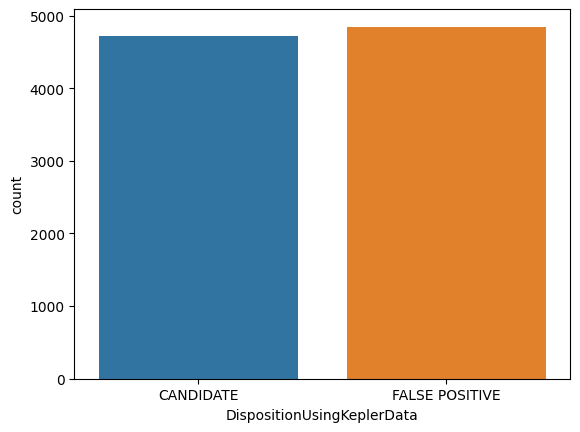

In [91]:
import seaborn as sns
sns.countplot(x = exoplanet_df['DispositionUsingKeplerData'])
print(exoplanet_df['DispositionUsingKeplerData'].value_counts())

ExoplanetArchiveDisposition
FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: count, dtype: int64


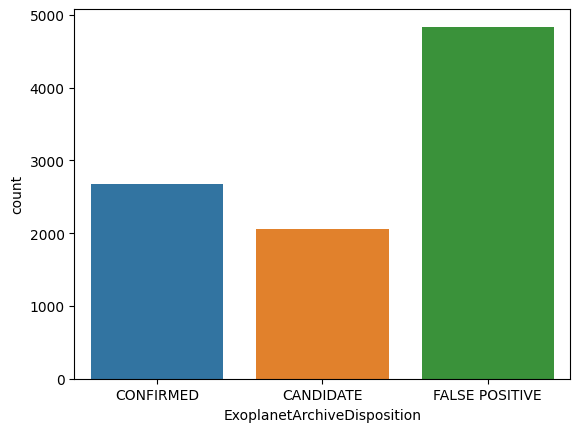

In [92]:
sns.countplot(x= exoplanet_df['ExoplanetArchiveDisposition'])
print(exoplanet_df['ExoplanetArchiveDisposition'].value_counts())

In [93]:
# Explore missing values by finding the percentage of missing values for each column - print as a data frame

import matplotlib.pyplot as plt

missing_values_percentage = (exoplanet_df.isnull().sum() / len(exoplanet_df)) * 100

missing_values_df = pd.DataFrame({'Column name':missing_values_percentage.index, 'Missing percentage':missing_values_percentage.values})

print(exoplanet_df.info())
print('\n')
print(missing_values_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

In [94]:
# visualize the missing values of the columns with the 5 most percentage of missing value

missing_values_df = missing_values_df.sort_values(by='Missing percentage', ascending=False)

top_five_columns_missing_values = missing_values_df.head(5)

print(top_five_columns_missing_values)

                               Column name  Missing percentage
30       EquilibriumTemperatureLowerUnc, K          100.000000
29       EquilibriumTemperatureUpperUnc, K          100.000000
2                               KeplerName           72.051443
5                         DispositionScore           15.788373
39  StellarEffectiveTemperatureLowerUnc, K            5.050188


In [95]:
# write a loop/script that will iterate through the features and 
# calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]


# Interquartile Range (IQR) method
def count_outliers(feature):
    # handle non-numeric values by converting them to NaN 
    feature = pd.to_numeric(feature, errors='coerce')
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (feature < lower_bound) | (feature > upper_bound)
    return outliers.sum()


outliers_count = {}
for column in exoplanet_df.columns:
    outliers = count_outliers(exoplanet_df[column])
    outliers_count[column] = outliers


print("Number of outliers for each feature")
for column, count in outliers_count.items():
    print(f'{column}: {count}')

# now that we have the number of outliers we can choose what to do with them : keep, replace or remove.
# outliers are data points that significantly derivate from the majority of the data in the data frame

Number of outliers for each feature
KepID: 0
KOIName: 0
KeplerName: 0
ExoplanetArchiveDisposition: 0
DispositionUsingKeplerData: 0
DispositionScore: 0
NotTransit-LikeFalsePositiveFlag: 1531
koi_fpflag_ss: 2226
CentroidOffsetFalsePositiveFlag: 1889
EphemerisMatchIndicatesContaminationFalsePositiveFlag: 1148
OrbitalPeriod, days: 1567
OrbitalPeriodUpperUnc, days: 1650
OrbitalPeriodLowerUnc, days: 1650
TransitEpoch, BKJD: 1046
TransitEpochUpperUnc, BKJD: 838
TransitEpochLowerUnc, BKJD: 838
ImpactParamete: 82
ImpactParameterUpperUnc: 736
ImpactParameterLowerUnc: 120
TransitDuration, hrs: 869
TransitDurationUpperUnc, hrs: 930
TransitDurationLowerUnc, hrs: 930
TransitDepth, ppm: 1798
TransitDepthUpperUnc, ppm: 1084
TransitDepthLowerUnc, ppm: 1084
PlanetaryRadius, Earthradii: 1469
PlanetaryRadiusUpperUnc, Earthradii: 1716
PlanetaryRadiusLowerUnc, Earthradii: 1390
EquilibriumTemperature, K: 411
EquilibriumTemperatureUpperUnc, K: 0
EquilibriumTemperatureLowerUnc, K: 0
InsolationFlux, Earthflux: 

    Keep Outliers:
        When to Use: In some cases, outliers represent important and meaningful information. They could indicate rare events, anomalies, or extreme values that are of interest to your analysis.
        Considerations: If you decide to keep outliers, be aware of their potential impact on statistical measures and modeling results. Some analytical techniques may be sensitive to outliers, so it's essential to assess the robustness of your analysis to extreme values.

    Remove Outliers:
        When to Use: If outliers are the result of data entry errors, measurement noise, or other artifacts, and they do not carry meaningful information, removing them can improve the accuracy of your analysis or model.
        Considerations: Removing outliers should be done carefully and with justification. It can lead to a loss of information, reduction in sample size, and potential bias if not done thoughtfully. Additionally, the choice of the threshold for identifying outliers matters.

    Replace Outliers:
        When to Use: In some situations, it may be appropriate to replace outliers with more typical values. This is often done when you suspect that the outliers are due to data entry errors or extreme values that are not representative of the underlying population.
        Considerations: When replacing outliers, you should choose replacement values carefully. Common approaches include imputing with the mean, median, or a value generated through interpolation. However, the choice of replacement method can affect the results, so it should be based on domain knowledge and analysis goals.

In [96]:
columns_to_see = ['NotTransit-LikeFalsePositiveFlag', 'koi_fpflag_ss', 'CentroidOffsetFalsePositiveFlag', 'EphemerisMatchIndicatesContaminationFalsePositiveFlag', 'OrbitalPeriod, days', 'TransitEpoch, BKJD', 'ImpactParamete', 'TransitDuration, hrs', 'TransitDepth, ppm', 'PlanetaryRadius, Earthradii', 'EquilibriumTemperature, K', 'InsolationFlux, Earthflux', 'TCEPlanetNumber']

print(exoplanet_df[columns_to_see].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 1   koi_fpflag_ss                                          9564 non-null   int64  
 2   CentroidOffsetFalsePositiveFlag                        9564 non-null   int64  
 3   EphemerisMatchIndicatesContaminationFalsePositiveFlag  9564 non-null   int64  
 4   OrbitalPeriod, days                                    9564 non-null   float64
 5   TransitEpoch, BKJD                                     9564 non-null   float64
 6   ImpactParamete                                         9201 non-null   float64
 7   TransitDuration, hrs                                   9564 non-null   float64
 8   TransitDepth, ppm                               

In [97]:
# remove columns with 100% missing values 

missing_columns = exoplanet_df.columns[exoplanet_df.isna().all()]

print(missing_columns)
print('\n')

exoplanet_df = exoplanet_df.dropna(axis=1, how='all')

print(exoplanet_df.info())


Index(['EquilibriumTemperatureUpperUnc, K', 'EquilibriumTemperatureLowerUnc, K'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                   

In [98]:
# remove irrelevant columns
columns_to_drop = ['KOIName','KeplerName','KepID','TCEDeliver']

exoplanet_df = exoplanet_df.drop(columns_to_drop, axis=1)
print(exoplanet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ExoplanetArchiveDisposition                            9564 non-null   object 
 1   DispositionUsingKeplerData                             9564 non-null   object 
 2   DispositionScore                                       8054 non-null   float64
 3   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 4   koi_fpflag_ss                                          9564 non-null   int64  
 5   CentroidOffsetFalsePositiveFlag                        9564 non-null   int64  
 6   EphemerisMatchIndicatesContaminationFalsePositiveFlag  9564 non-null   int64  
 7   OrbitalPeriod, days                                    9564 non-null   float64
 8   OrbitalPeriodUpperUnc, days                     

In [99]:
print(exoplanet_df[['DispositionScore','StellarEffectiveTemperatureLowerUnc, K']])

      DispositionScore  StellarEffectiveTemperatureLowerUnc, K
0                1.000                                   -81.0
1                0.969                                   -81.0
2                0.000                                  -176.0
3                0.000                                  -174.0
4                1.000                                  -211.0
...                ...                                     ...
9559             0.000                                  -166.0
9560             0.497                                  -220.0
9561             0.021                                  -236.0
9562             0.092                                  -128.0
9563             0.000                                  -225.0

[9564 rows x 2 columns]


In [100]:
# remove rows with missing values
# create a correlation matrix and discuss, then drop appropiate columns

In [101]:
# change values in ExoplanetArchiveDisposition and DispositionUsingKeplerData

mapping = {'FALSE POSITIVE': 0, 'CANDIDATE': 1, 'CONFIRMED': 2}

exoplanet_df['ArchiveDispositionStatus'] = exoplanet_df['ExoplanetArchiveDisposition'].replace(mapping)
exoplanet_df['KeplerDispositionStatus'] = exoplanet_df['DispositionUsingKeplerData'].replace(mapping)

exoplanet_df = exoplanet_df.drop(['ExoplanetArchiveDisposition','DispositionUsingKeplerData'], axis=1)

print(exoplanet_df[['ArchiveDispositionStatus','KeplerDispositionStatus']])
print('\n')
print(exoplanet_df.info())


      ArchiveDispositionStatus  KeplerDispositionStatus
0                            2                        1
1                            2                        1
2                            1                        1
3                            0                        0
4                            2                        1
...                        ...                      ...
9559                         0                        0
9560                         1                        1
9561                         0                        0
9562                         1                        1
9563                         0                        0

[9564 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DispositionScore     